### Brain MRI Images for Brain Tumor Detection

Importation des donnees 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [2]:
import tensorflow as tf
import numpy as np

# Chemins vers les dossiers
train_dir = "D:/Projets_Machine_Learning/Brain_MRI_Images_for_Brain_Tumor_Detection/dataBase/train"
test_dir =  "D:/Projets_Machine_Learning/Brain_MRI_Images_for_Brain_Tumor_Detection/dataBase/test"

# Taille des images (redimensionner car les images n'ont pas la meme dimension)
# 224x224 est une taille standard utilisée par beaucoup de modèles pré-entraînés (ex: ResNet, VGG, MobileNet)
IMG_SIZE = (224, 224)

# Chargement des datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    label_mode='int',  # 0 = no, 1 = yes
    batch_size=None,   # Important pour récupérer un seul tensor, pas par batch
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    label_mode='int',
    batch_size=None,
    shuffle=False
)

# Conversion en arrays NumPy
train_images = []
train_labels = []
for img, label in train_ds:
    train_images.append(img.numpy())
    train_labels.append(label.numpy())

test_images = []
test_labels = []
for img, label in test_ds:
    test_images.append(img.numpy())
    test_labels.append(label.numpy())

# Transformer en arrays NumPy complets
train_images = np.stack(train_images)
train_labels = np.array(train_labels)
test_images = np.stack(test_images)
test_labels = np.array(test_labels)

# Regrouper comme dans Fashion MNIST
ss = ((train_images, train_labels), (test_images, test_labels))

print("Format final de ss :")
print("train_images shape :", ss[0][0].shape)
print("train_labels shape :", ss[0][1].shape)
print("test_images shape :", ss[1][0].shape)
print("test_labels shape :", ss[1][1].shape)


Found 253 files belonging to 2 classes.
Found 253 files belonging to 2 classes.
Format final de ss :
train_images shape : (253, 224, 224, 3)
train_labels shape : (253,)
test_images shape : (253, 224, 224, 3)
test_labels shape : (253,)


In [3]:
# Afficher quelques étiquettes
print("10 premiers labels d'entraînement :", ss[0][1][:1000])

10 premiers labels d'entraînement : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


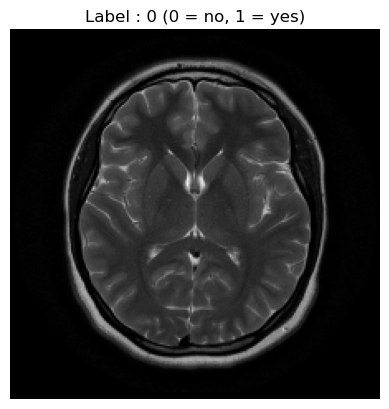

In [4]:
import matplotlib.pyplot as plt

# Extraire les données
(train_images, train_labels), (test_images, test_labels) = ss

# Afficher la première image et son étiquette
plt.imshow(train_images[0].astype("uint8"))  # tf.image_dataset_from_directory renvoie des float32
plt.title(f"Label : {train_labels[0]} (0 = no, 1 = yes)")
plt.axis('off')
plt.show()

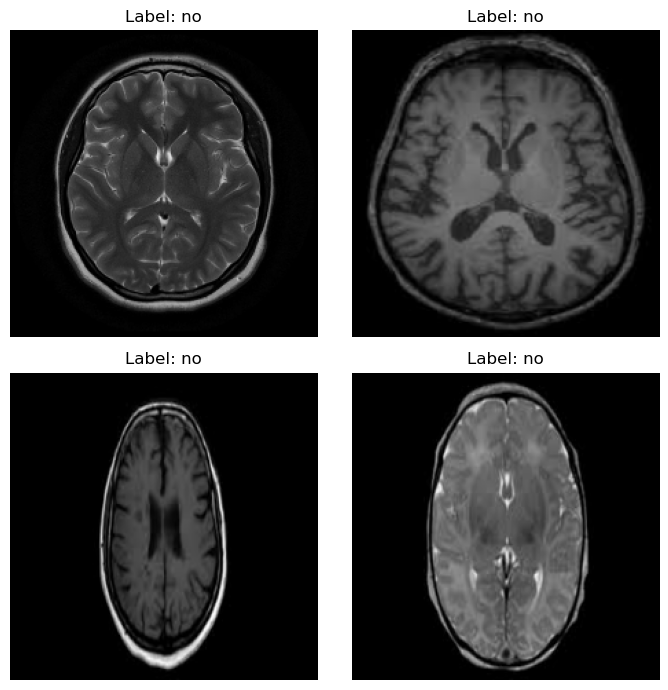

In [5]:
import matplotlib.pyplot as plt

# Extraire les données
(train_images, train_labels), _ = ss

# Créer une figure
plt.figure(figsize=(7, 7))

# Boucle pour les 4 premières images
for i in range(4):
    plt.subplot(2, 2, i + 1)  # 2 lignes, 2 colonnes
    plt.imshow(train_images[i].astype("uint8"))
    label = train_labels[i]
    label_text = "yes" if label == 1 else "no"
    plt.title(f"Label: {label_text}")
    plt.axis('off')

plt.tight_layout()
plt.show()
